# **AlexNet** : 2012

AlexNet is a convolutional neural network that is 8 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

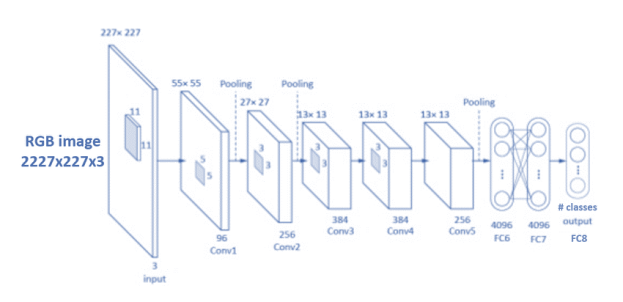

In [84]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [85]:
# Define the AlexNet-like model
model_alex = tf.keras.Sequential([
    tf.keras.layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
    tf.keras.layers.Conv2D(256, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
    tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1000, activation='softmax')
])

In [86]:
# Load and preprocess an image
img_path = "/content/dog.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [87]:
# Predict class probabilities
pred = model_alex.predict(x)
print('predicted', decode_predictions(pred, top=3)[0])

1/1 [==============================] - 0s 97ms/step
predicted [('n03924679', 'photocopier', 0.0778696), ('n07880968', 'burrito', 0.021675553), ('n01843065', 'jacamar', 0.02046585)]


## **ZFNet** : 2013

It can be used to visually determine which parameters should be tuned to get better accuracy instead of trial and error. By visualizing the different layers of AlexNet, ZFNet improved the accuracy by fine-tuning AlexNet. ZFNet is a very good example of how much interesting the field of machine learning is.

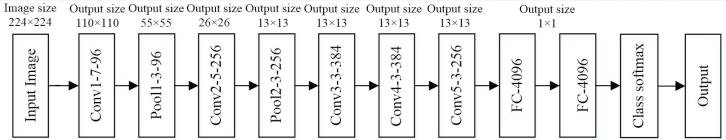

In [88]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
import numpy as np



In [89]:
# Create a ZfNet-like model
model_zf = Sequential([
    Conv2D(96, (7, 7), strides=(2, 2), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((3, 3), strides=(2, 2)),
    Conv2D(256, (5, 5), activation='relu'),
    MaxPooling2D((3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), activation='relu'),
    Conv2D(384, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1000, activation='softmax')
])

In [90]:
# Load and preprocess an image
img_path = "/content/dog.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize pixel values to the range [0, 1]

In [91]:
# Predict class probabilities
pred = model_zf.predict(x)
print('predicted', decode_predictions(pred, top=3)[0])

1/1 [==============================] - 0s 93ms/step
predicted [('n03467068', 'guillotine', 0.001063605), ('n04347754', 'submarine', 0.0010601417), ('n02095314', 'wire-haired_fox_terrier', 0.0010569965)]


## **VGGNet** 2014

Developed as a deep neural network, the VGGNet also surpasses baselines on many tasks and datasets beyond ImageNet. Moreover, it is now still one of the most popular image recognition architectures.

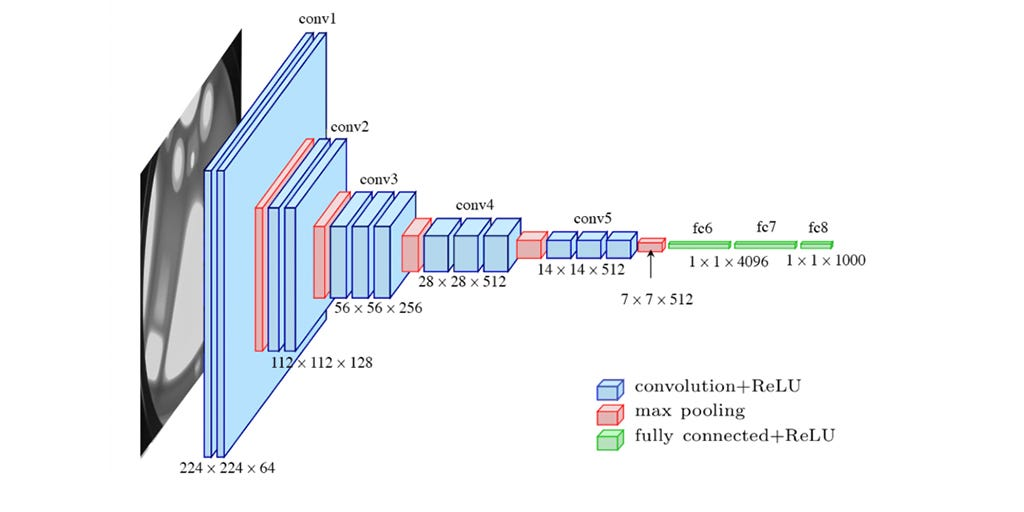

In [92]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np


In [93]:
# Load the VGG16 model pre-trained on ImageNet data
model = VGG16(weights='imagenet')


In [94]:
# Load and preprocess an image
img_path = "/content/dog.jpg"
img = image.load_img(img_path, target_size=(224, 224))  # VGG16 input shape
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


In [95]:
# Predict class probabilities
pred = model.predict(x)
print('predicted', decode_predictions(pred, top=3)[0])

1/1 [==============================] - 0s 149ms/step
predicted [('n02093256', 'Staffordshire_bullterrier', 0.8576814), ('n02093428', 'American_Staffordshire_terrier', 0.09598328), ('n02108422', 'bull_mastiff', 0.021528041)]


## **GoogleNet** : 2015

we use GoogleNet for various Computer Vision applications, including Object Detection, Image Classification, etc. Around 18% of the GoogleNet applications are based on Image Classification, and about 10-10% are Object Detection and Quantization.

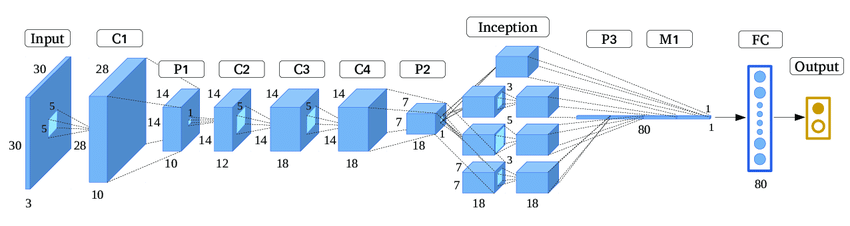

In [96]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

In [97]:
# Load the InceptionV3 model pre-trained on ImageNet data
model = InceptionV3(weights='imagenet')

In [98]:
# Load and preprocess an image
img_path = '/content/dog.jpg'
img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 input shape
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [99]:
# Predict class probabilities
pred_alexnet = model.predict(x)
decoded_predictions_alex = decode_predictions(pred_alexnet, top=5)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions_alex):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 [==============================] - 1s 1s/step
1: bull_mastiff (0.57)
2: boxer (0.06)
3: French_bulldog (0.05)
4: American_Staffordshire_terrier (0.04)
5: Staffordshire_bullterrier (0.04)


# **ResNet** 2016

ResNet provides an innovative solution to the vanishing gradient problem, known as “skip connections”. ResNet stacks multiple identity mappings (convolutional layers that do nothing at first), skips those layers, and reuses the activations of the previous layer.

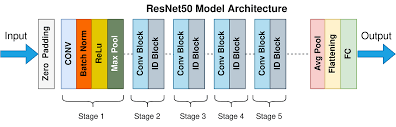

In [106]:
#ResNet 50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [101]:
model = ResNet50(weights='imagenet')

In [102]:
img_path = "/content/dog.jpg"
img = image.load_img(img_path,target_size = (224,224,))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

In [103]:
pred = model.predict(x)
print('predicted',decode_predictions(pred,top=3)[0])

1/1 [==============================] - 1s 1s/step
predicted [('n02093256', 'Staffordshire_bullterrier', 0.89382696), ('n02093428', 'American_Staffordshire_terrier', 0.06997609), ('n02099712', 'Labrador_retriever', 0.014348971)]
